In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine
from datetime import date, timedelta
import calendar

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from itables import show
pd.options.display.max_rows = 31

engine = create_engine("sqlite:///c:\\ruby\\expense\\db\\development.sqlite3")
conn = engine.connect()

In [2]:
sql = "SELECT C.name AS item, G.name AS kind FROM categories C \
       JOIN groups G ON group_id = G.id"
df_c = pd.read_sql(sql, conn)
df_c.head()

,item,kind
0,Books & Software,Edutainment
1,CCF,Luxury
2,Cigarette,Luxury
3,Food,Food
4,Fuel,Transportation


In [3]:
month = date(2022, 4, 1)
bom = month
eom = month.replace(day=calendar.monthrange(month.year, month.month)[1])
bom, eom

(datetime.date(2022, 4, 1), datetime.date(2022, 4, 30))

In [4]:
bom
eom

datetime.date(2022, 4, 1)

datetime.date(2022, 4, 30)

In [5]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "%s" 
ORDER BY amount DESC
"""
sql = sql % eom
print(sql)


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "2022-04-30" 
ORDER BY amount DESC



In [6]:
df = pd.read_sql(sql, conn)
df

,date,amount,item,kind
0,2022-04-30,10000,Parent,Parent
1,2022-04-30,640,Internet Home,Communication
2,2022-04-30,600,CCF,Luxury
3,2022-04-30,340,Packt,Edutainment
4,2022-04-30,320,Telephone Dtac,Communication
5,2022-04-30,200,Pets,Pets
6,2022-04-30,190,Monthly Prime,Movies
7,2022-04-30,170,Google,Edutainment
8,2022-04-30,100,Apple,Edutainment
9,2022-04-30,70,Patreon,Edutainment


In [7]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "%s" 
ORDER BY amount DESC
"""
sql = sql % (eom)
print(sql)


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "2022-04-30" 
ORDER BY amount DESC



In [8]:
df_eom = pd.read_sql(sql, conn)
df_eom

,date,amount,item,kind
0,2022-04-30,10000,Parent,Parent
1,2022-04-30,640,Internet Home,Communication
2,2022-04-30,600,CCF,Luxury
3,2022-04-30,340,Packt,Edutainment
4,2022-04-30,320,Telephone Dtac,Communication
5,2022-04-30,200,Pets,Pets
6,2022-04-30,190,Monthly Prime,Movies
7,2022-04-30,170,Google,Edutainment
8,2022-04-30,100,Apple,Edutainment
9,2022-04-30,70,Patreon,Edutainment


In [9]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date BETWEEN "%s" AND "%s" 
ORDER BY date
"""
sql = sql % (bom, eom)
print(sql)


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date BETWEEN "2022-04-01" AND "2022-04-30" 
ORDER BY date



In [10]:
df_t = pd.read_sql(sql, conn)
df_t.head()

,date,amount,item,kind
0,2022-04-04,230,Food,Food
1,2022-04-04,1420,Fuel,Transportation
2,2022-04-06,600,Food,Food
3,2022-04-06,1000,Funeral,Others
4,2022-04-07,420,Food,Food


In [11]:
grouped = df_t.groupby("item")
grouped['amount'].sum()

item
Apple               140
CCF                 600
Food               7210
Fuel               2800
Funeral            1000
Google              170
Internet Home       640
Monthly Prime       190
Mother             3910
Packt               340
Parent            10000
Patreon              70
Personal Care       300
Pets              20660
Telephone Dtac      320
True Visions      22800
Name: amount, dtype: int64

In [12]:
grouped = df_t.groupby("kind")
grouped['amount'].sum()

kind
Apparel             300
Communication     23760
Edutainment         720
Food               7210
Luxury              600
Movies              190
Others             1000
Parent            13910
Pets              20660
Transportation     2800
Name: amount, dtype: int64

In [13]:
expense = grouped.amount.sum()
sum(expense)

71150

<Figure size 864x864 with 0 Axes>

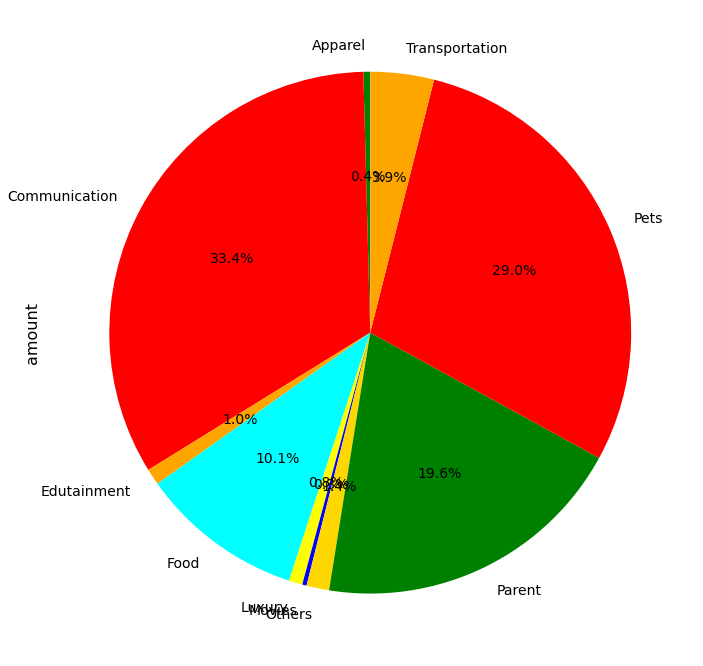

In [14]:
fig_path = "../fig/Expense-2204.png"
with plt.style.context("my_custom_style"):
    plt.figure(figsize=(12, 12))
    ax = expense.plot.pie(
        colors=["green", "red", "orange", "cyan", "yellow", "blue", "gold"],
        startangle=90,
        autopct="%1.1f%%",
    )
    plt.savefig(fig_path)

In [15]:
expense.to_csv("../data/expense-2204.csv")

In [16]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "%s" 
ORDER BY date
"""
sql = sql % (eom)
print(sql)


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "2022-04-30" 
ORDER BY date



In [17]:
df_tmp = pd.read_sql(sql, conn)
show(df_tmp[['date','amount','item','kind']])

<IPython.core.display.Javascript object>

date,amount,item,kind


In [18]:
df_tmp.to_csv("../data/expense-eom.csv")